# comandos simples para o Lookerstudio

Relatório de trabalho => https://lookerstudio.google.com/reporting/f5f4f65b-7001-4b9c-a380-a7d0b1107b7f/page/p_puehmbaiqd


https://lookerstudio.google.com/reporting/409cdfa7-698b-4dfa-b9ec-b01b847c4ecb/page/p_gf9cauobrd


In [1]:
#data computada


leitura ="""

year(abertura)

month(abertura)

year(fechamento)


MONTH(fechamento)

"""

Calcular o filtro de abertura, adicionar um novo campo.


In [2]:

leitura ="""
if(mes_abertura = p_mes and ano_abertura = p_ano, 1,0)
"""


In [3]:

#Calcular o filtro de fechamento

leitura ="""
if(mes_fechamento = p_mes and ano_fechamento = p_ano, 1,0)
"""


# filtro_mes_atual

leitura ="""
if(month(data)=mes and year(data)=ano,1,0)
"""

In [4]:
#Colocar o filtro 

#mais complicado:

#filtro_mes_anterior
leitura ="""
if(mes>01,
if(month(data)=mes-1 and year(data)=ano,1,0),
if(month(data)=12 and year(data)=ano-1, 1,0))
"""

In [5]:
#Filtro do mês atual

#filtro_mes_atual
leitura ="""

case
when Ano_site = year(data) and Mes_site = month(data) then 1
else 0
end

"""

In [6]:
#Filtro do mês anterior, criar o campo

#filtro_mes_anterior


leitura ="""
if(Mes_site>01,
if(Month(data)=Mes_site -1 and year(data)=Ano_site,1,0),
if(Month(data)=12 and YEAR(data)=Ano_site-1,1,0))

"""

In [7]:
#Criar as métricas

#leads 
leitura ="""

sum(if(tipo='leads', valor, 0))
"""

In [8]:
#visitantes

leitura ="""
sum(if(tipo='visitantes', valor, 0))
"""

In [9]:

#oportunidades

leitura ="""
sum(if(tipo='oportunidades', valor, 0))

#Criar as métricas
#vendas
sum(if(tipo='vendas', valor, 0))



#Leads_atual
sum(if(tipo='leads' and filtro_mes_atual =1, valor, 0))


#Leads_anterior


sum(if(tipo='leads' and filtro_mes_anterior =1, valor, 0))
"""

In [10]:

leitura ="""

#Visitantes_atual
sum(if(tipo='visitantes' and filtro_mes_atual =1, valor, 0))


#Visitantes_anterior
sum(if(tipo='visitantes' and filtro_mes_anterior =1, valor, 0))


#Oportunidades_atual
sum(if(tipo='oportunidades' and filtro_mes_atual =1, valor, 0))

#Oportunidades_anterior
sum(if(tipo='oportunidades' and filtro_mes_anterior =1, valor, 0))


#Vendas_atual
sum(if(tipo='vendas' and filtro_mes_atual =1, valor, 0))


#Vendas_anterior
sum(if(tipo='vendas' and filtro_mes_anterior =1, valor, 0))


"""

In [11]:
# Incluir setas
#variacao_visitantes

leitura ="""
(Novo valor - Valor antigo) / Valor antigo = Variação percentual

(Visitantes_atual - visitantes_anterior)/visitantes_anterior

(Leads_atual - Leads_anterior)/Leads_anterior

"""

emoji

In [12]:
leitura ="""

#variacao_oportunidades
(Oportunidades_atual - Oportunidades_anterior)/ Oportunidades_anterior



#variacao_vendas
(Novo valor - Valor antigo) / Valor antigo = Variação percentual
(Vendas_atual - Vendas_anterior)/Vendas_anterior


#variacao_vendas_icone (texto)
case
when variacao_vendas < 0 then CONCAT('👎', round((variacao_vendas*100),2),'%')
else CONCAT('👍', round((variacao_vendas*100),2),'%')
end 

case
when variacao_vendas < 0 then replace(CONCAT('👎', round((variacao_vendas*100),2),'%'),'.',',')
else replace(CONCAT('👍', round((variacao_vendas*100),2),'%'),'.',',')
end 



"""

inserir novo campo, na fonte de dados:

In [13]:
leitura ="""
case

when valor_venda is not null and valor_locacao is null then 'Venda'

when valor_venda is not null and valor_locacao is not null then 'Venda e Locação'

else 'Locação'

end
"""

In [14]:
#filtro_vendas
leitura ="""
case
when Tipo de Negócios = 'Todos' then 1
when CONTAINS_TEXT(tipo, Tipo de Negócios) then 1 
else 0
end
"""

In [16]:


leitura="""

#Sub com tratamento


v2 - IFNULL(v3,0)
#Versões

IF(v3 is null, 0, v3)

IF(v3 is not null, v3, 0)


#Avg sem tratamento

(v1+v2+v3)/3
"""

In [17]:


leitura="""


# Média personalizada
#(calcular pela real quantidade)


(IFNULL(v1,0)+ IFNULL(v2, 0)+ IFNULL(v3,0))/ (IF(v1 is null, 0,1) + IF(v2 is null, 0,1) + IF(v3 is null, 0,1))

#Abaixo conta a quantidade: 
(IF(v1 is null, 0,1) + IF(v2 is null, 0,1) + IF(v3 is null, 0,1))
"""

In [18]:


#contagem v3 com os nulos
leitura="""

IFNULL(V3,0)
# clicar em contagem

#contagem v3 com os nulos count

COUNT(IFNULL(V3,0))

#média v2 com nulo (Contanto todas as linhas)
IF(v2 is null, 0, v2)


#média v2 ignorar negativos e nulos (fazer média ignorando negativos e nulos)
IF(v2 <0, NULL, v2)

"""

In [19]:
#ID NOVO
leitura="""

IF(id (Tabela 1) is null, id (Tabela 2), id (Tabela 1))

colocar um valor que não é nulo, sem if 


"""

retorna o primeiro valor que não é nulo  => COALESCE()

In [20]:
leitura="""

#colocar um valor que não é nulo, sem if 

#retorna o primeiro valor que não é nulo

COALESCE(id (Tabela 1),id (Tabela 2))



"""

Meta valor tabela 2

cálculo do status

In [21]:


leitura="""
if(valor (loja-vendas) >= valor (loja-metas), '✅', '❌')

"""

Emoji em html: https://www.w3schools.com/html/html_emojis.asp


Lista de funções

https://support.google.com/looker-studio/table/6379764?hl=pt-BR

https://cloud.google.com/looker/docs/studio/about-calculated-fields?hl=pt-br


SUBSTR  - limitado :

Retorna um texto que é uma substring de X. A substring começa no índice inicial e tem length caracteres.

SUBSTR(X, start index, length)


REPLACE:
Retorna uma cópia de X com todas as ocorrências de Y em X substituídas por Z.

REPLACE(X, Y, Z)


não temos um padrão, ideal:

expressão regular:

REGEXP_REPLACE

Substitui todas as ocorrências de texto correspondentes ao padrão de expressão regular em "X" pela string de substituição.

REGEXP_REPLACE(X, regular_expression, replacement)



Ver se a regra combina: 

REGEXP_MATCH	

Retorna "true" se X corresponder ao padrão de expressão regular. Caso contrário, retorna "false".

REGEXP_MATCH(X, regular_expression)

Extrair um pedaço do texto:

REGEXP_EXTRACT

Retorna a primeira substring correspondente em "X", que corresponde ao padrão de expressão regular.

Saiba mais.

REGEXP_EXTRACT(X, regular_expression)

ifnull(REGEXP_EXTRACT(pagina, '[cod:| codigo| cod]([0-9]+)')

REGEXP_EXTRACT(CAMPO = pagina, REGRA QUE COMBINAMOS PARA EXTRAIR :'[cod:|codigo|cod]([0-9]+)')

REGRA QUE COMBINAMOS PARA EXTRAIR :

 tem cod: ou codigo cod [cod:|codigo|cod]
 
pegar os dados que estão na frente para extrair ([0-9]+), sendo que pode ser número de 0 à 9. O + é que não há padrão de quantidade de 
números nas linhas, coleta o que tiver em sequência. 



[] criar um conjunto de caracteres para correspondência

() agrupar partes de uma expressão, elemento para extração ou grupos para alterar posição

+ corresponde ao caractere anterior uma ou mais vezes. 


In [22]:

leitura="""

REGEXP_EXTRACT(pagina, '[cod:| codigo| cod]([0-9]+)')
"""

In [23]:
leitura="""

ifnull(REGEXP_EXTRACT(pagina, '[cod:| codigo| cod]([0-9]+)'), '(not set)')

"""


testa palavras

[] criar um conjunto de caracteres para correspondência => ter a palavra cod: ou codigo ou cod

() agrupar partes de uma expressão, elemento para extração ou grupos para alterar posição  => ter número de 0 à 9 e letra de a à z

+ corresponde ao caractere anterior uma ou mais vezes. 

* Corresponde ao caractere anterior nenhuma ou mais vezes

-? onde começar com o – ou não ?

REGEXP_REPLACE(pagina, '-? (cod:|codigo|cod)[0-9a-z]*', '')




In [24]:
leitura="""

REGEXP_REPLACE(pagina, '-? (cod:|codigo|cod)[0-9a-z]*', ' ')

"""


Trocar tudo que tiver como home (independente ser h ou H) para Home na parte do "(?i)home.*"

?i ativa o modo que não diferencia minúsculas ou maiúsculas.

. corresponde a qualquer caractere único (letra, número ou símbolo)

* Corresponde ao caractere anterior nenhuma ou mais vezes
* 
? Correspone ao caractere anterior nenhuma ou uma vez

\\s espaço



outra regra '(.*[^\\s])-(.*)', '\\1 \\2')

'(.*[^\\s])-(.*)'

retirar o -

antes dele pode ter qualquer coisa

.*

mas não pode ter espaço [^\\s], o ^ é a negação

depois pode ter qualquer coisa, grupo (.*)

colocar:

\\1 \\2

espaço, 1 é os caracter extraido antes do -

espaço, 2 é os caracter extraido depois do -

se testar o \\1 fff \\2, coloca no lugar do - os valores fff.


Página em visão completa:



In [26]:
leitura="""

CASE
   WHEN REGEXP_MATCH(pagina, "(?i)home.*") THEN "Home"
   else REGEXP_REPLACE(REGEXP_REPLACE(pagina, '-? (cod:|codigo|cod)[0-9a-z]*', '') , '(.*[^\\s])-(.*)', '\\1 \\2')   
END 
"""


Dimensao_modelo

REGEXP_EXTRACT(cidade,'.*-.*-(.*)')

caractér foco -

REGEXP_EXTRACT(cidade,'.*-.*-(.*)')

.* => . qualquer caracter e pode aparecer várias vezes *
entre o -

expressão regular


In [28]:
leitura="""

REGEXP_EXTRACT(cidade,'.*-.*-(.*)')


IFNULL(REGEXP_EXTRACT(cidade,'.*-.*-(.*)'), cidade )


"""

Trocar para deixar -SP

BR-SP-Campinas

1 - 2 – 3

Ficou como Campinas-SP \\3-\\2

In [29]:
leitura="""
REGEXP_REPLACE(cidade,'(.*)-(.*)-(.*)', '\\3-\\2' )

"""

In [30]:
#hora_only, colocamos como hora

#função

leitura="""
CAST(REGEXP_EXTRACT(hora, "(.*):.*:.*") as NUMBER)

"""
#Coleta () na forma de texto

#.* qualquer

In [31]:
leitura="""


CAST(REGEXP_EXTRACT(hora, "(.*):.*:.*") as NUMBER)
"""

CAST(X AS TYPE)

novo campo adicionado

Periodo

In [32]:

leitura="""


case

when hora_only>=6 and hora_only <12 then "Manhã"
when hora_only>=12 and hora_only<18 then "Tarde"
else "Noite"

end
"""

hora_only2, colocamos como hora


HOUR(PARSE_DATETIME("%H:%M:%S", hora))

In [33]:

leitura="""


HOUR(PARSE_DATETIME("%H:%M:%S", hora))

"""

In [36]:
# adaptar - curiosidade
leitura="""

HOUR(PARSE_DATETIME("%d/%m/%Y %H:%M:%S", concat('15/03/2025', '', hora)))


HOUR(PARSE_DATETIME("%d/%m/%Y %H:%M:%S", concat('15/03/2025', ' ', hora)))


PARSE_DATETIME("%d/%m/%Y %H:%M:%S", concat('15/03/2025', ' ', hora))
"""

Não pesar os dados no lookerstudio

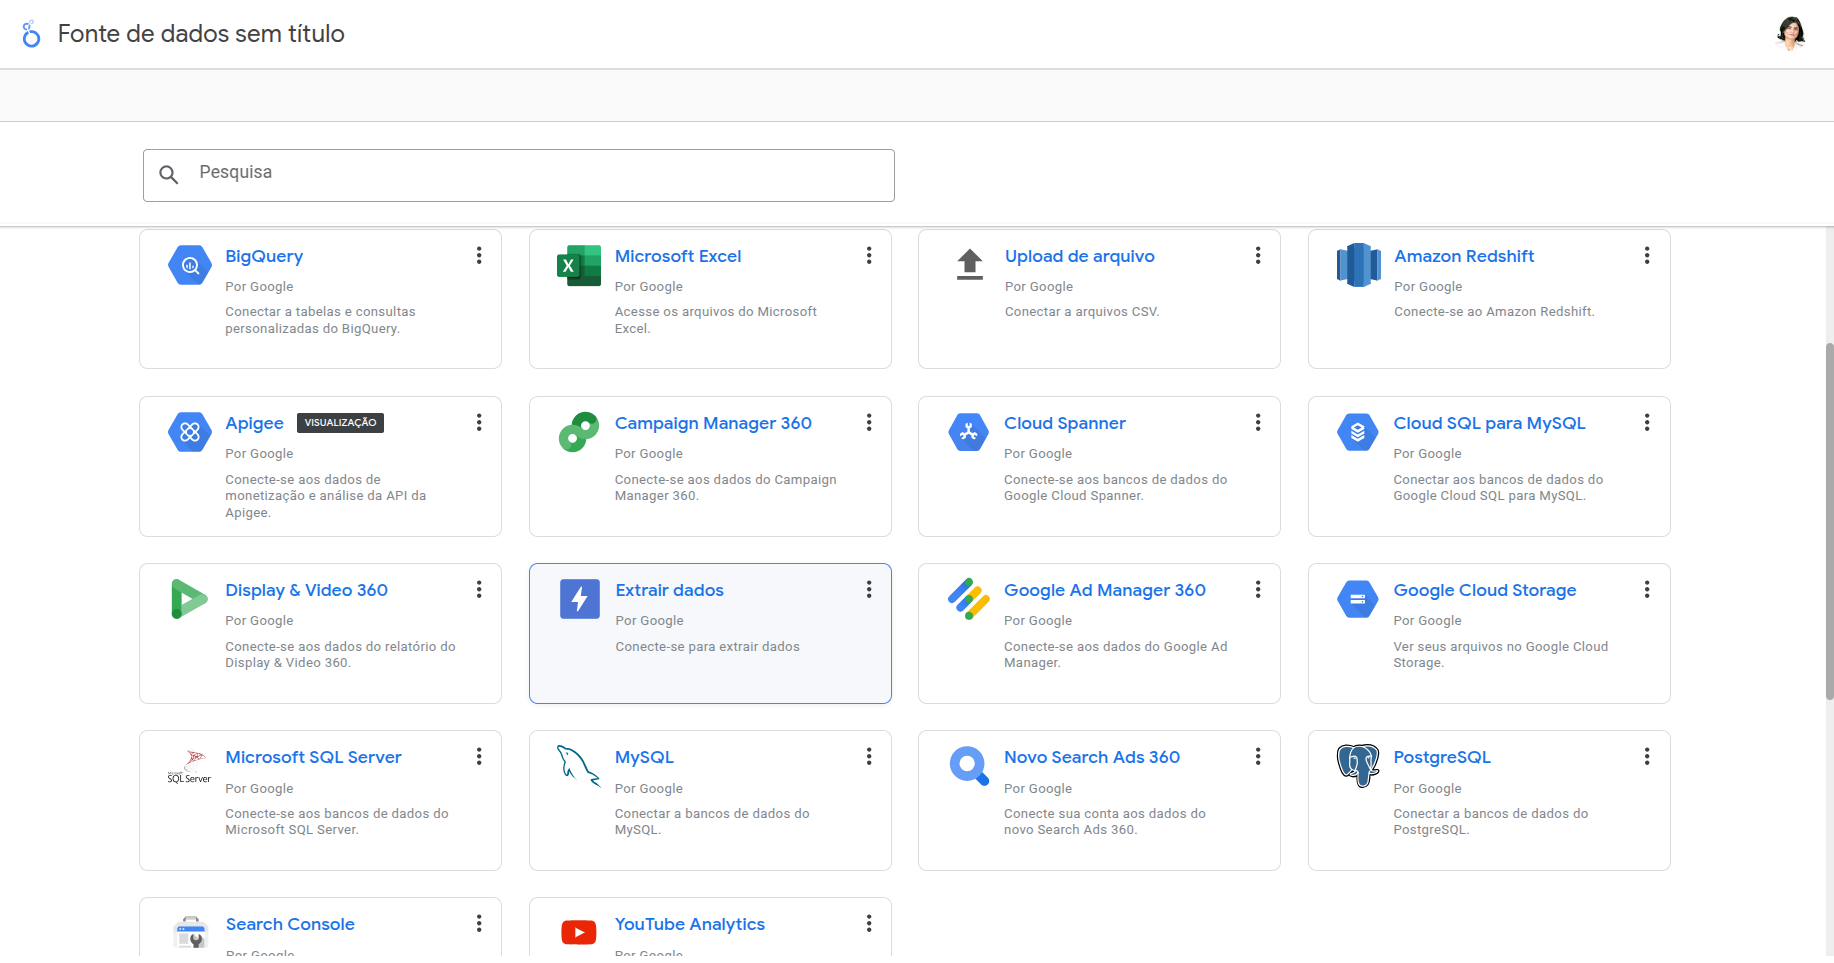

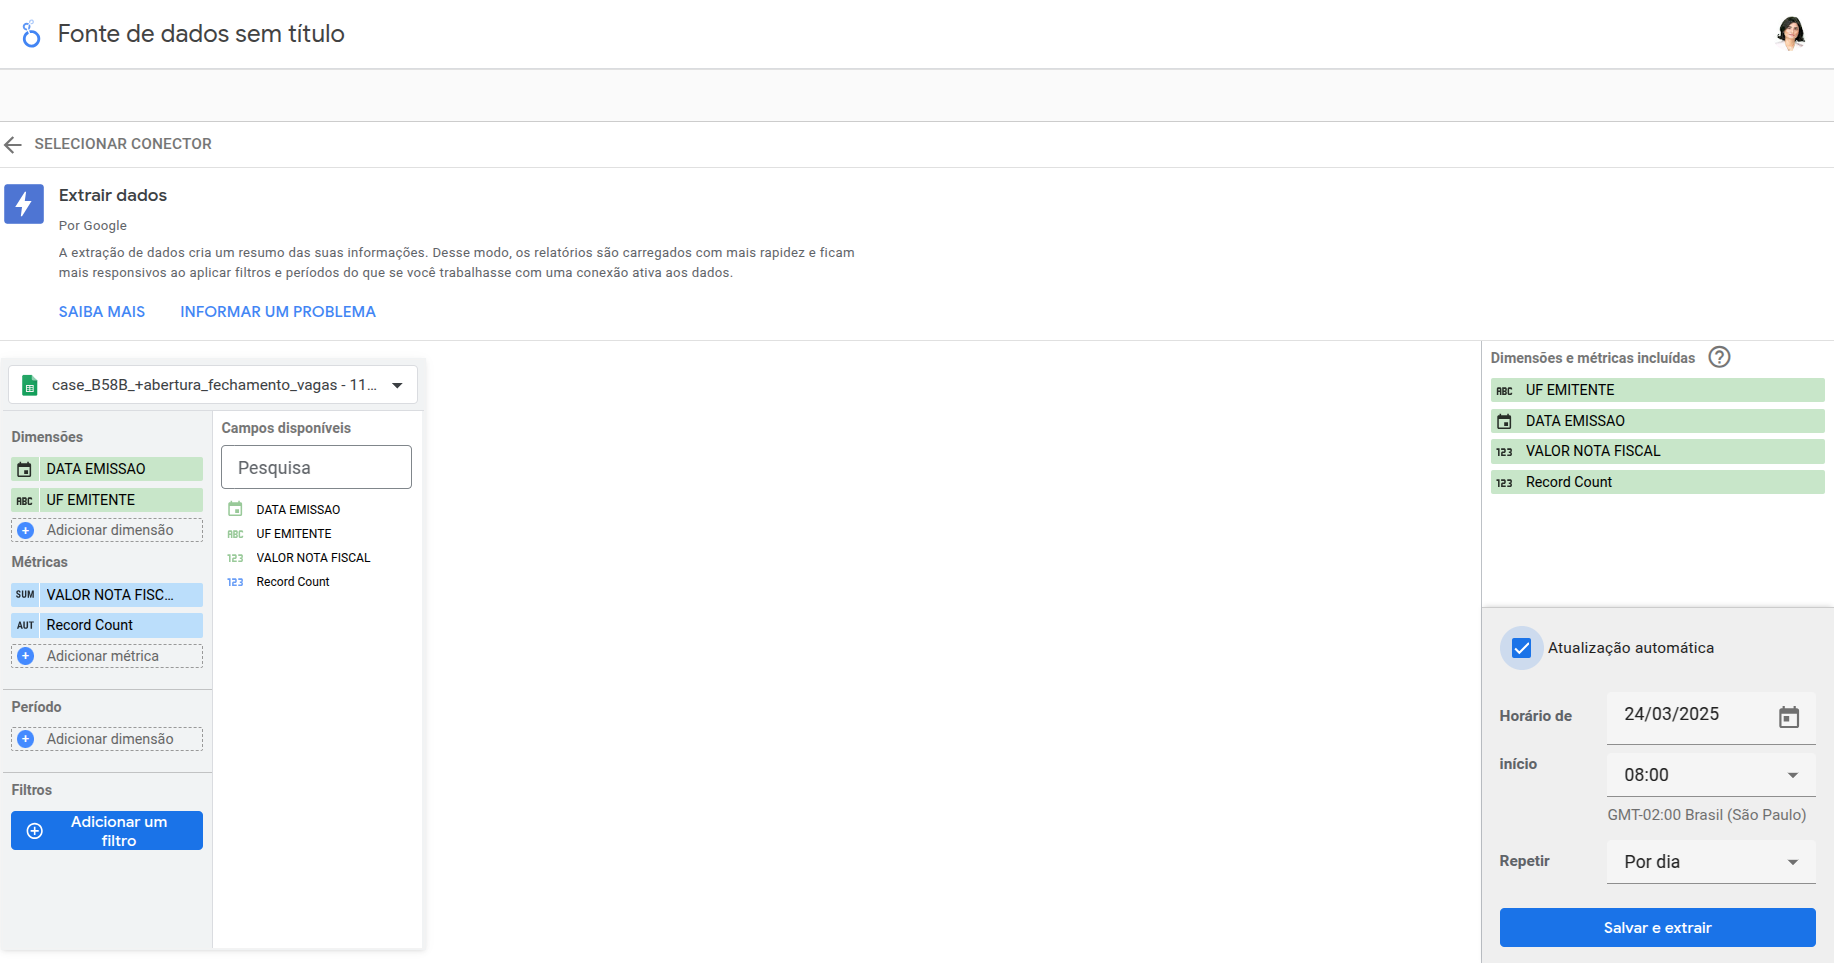

In [37]:


leitura="""

AVG(alteracao_preco)


CONCAT(ID,'b')

#ID
IF(ID (Tabela 1) is null,
IF (ID (Tabela 2) is null,ID (Tabela 3),ID (Tabela 2)),
ID (Tabela 1))


#MATERIA
IF(Matéria (Tabela 1) is null,
IF(Matéria (Tabela 2) is null,Matéria (Tabela 3) , Matéria (Tabela 2) ),
Matéria (Tabela 1))


#CLASSIFICACAO

IF( Classifique seus conhecimentos em: [Inglês] (Tabela 1) is null,
IF( Classifique seus conhecimentos em: [Inglês] (Tabela 2) is null,Classifique seus conhecimentos em: [Inglês] (Tabela 3) , Classifique seus conhecimentos em: [Inglês] (Tabela 2) ),
Classifique seus conhecimentos em: [Inglês] (Tabela 1))


"""

In [38]:
leitura="""
SUM(IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Basquete"), 1,0))


#m_ciclismo
SUM(IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Ciclismo"), 1,0))

#m_corrida
SUM(IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Corrida"), 1,0))

#m_futebol
SUM(IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Futebol"), 1,0))

#m_volei
SUM(IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Volei"), 1,0))

"""

In [39]:
leitura="""



#Chave

#faremos uma nova combinação

#chave2

IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Futebol"), 
CONCAT("Futebol"),
null
)



IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Volei"), 
CONCAT("Volei"),
null
)


IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Ciclismo"), 
CONCAT("Ciclismo"),
null
)


IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Corrida"), 
CONCAT("Corrida"),
null
)



IF(CONTAINS_TEXT(Você gosta de esportes? Quais? Deixe em branco se não gostar, "Basquete"), 
CONCAT("Basquete"),
null
)



#contagem

case 
   when chave2 (Tabela 1) is not null then chave2 (Tabela 1)
   when chave2 (Tabela 2) is not null then chave2 (Tabela 2)
   when chave2 (Tabela 3) is not null then chave2 (Tabela 3)
   when chave2 (Tabela 4) is not null then chave2 (Tabela 4)
   else chave2 (Tabela 5)

end


case 
   when Record Count (Tabela 1) is not null then Record Count (Tabela 1) 
   when Record Count (Tabela 2) is not null then Record Count (Tabela 2)
   when Record Count (Tabela 3) is not null then Record Count (Tabela 3)
   when Record Count (Tabela 4) is not null then Record Count (Tabela 4)
   else Record Count (Tabela 5)   
end
"""